In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
import psycopg2
from psycopg2 import sql
from psycopg2.extensions import adapt, register_adapter, AsIs
from sqlalchemy import create_engine
import getpass

In [ ]:
database = 'f24t03'
user = 'jsmm8'
password = getpass.getpass("Type password and hit enter: ")

Type password and hit enter: ········


In [ ]:
try:
    # Connect to the PostgreSQL database
    connection = psycopg2.connect(dbname=database, user=user, password=password, host='pgsql')
    cursor = connection.cursor()

    # Execute a query to get all table names
    cursor.execute("""
        SELECT table_name 
        FROM information_schema.tables 
        WHERE table_schema = 'public';
    """)
    
    # Fetch all results
    tables = cursor.fetchall()

    # Print the table names
    print("Tables in the database:")
    for table in tables:
        print(table[0])

except Exception as e:
    print(f"An error occurred: {e}")

finally:
    # Close the cursor and connection
    if cursor:
        cursor.close()
    if connection:
        connection.close()

Tables in the database:
ethnicity
year_built
education_levels
tenure_by_bedrooms
tenure_by_kitchen
tenure_by_plumbing
rooms
imputed_median_house_value
education_categories
demographics_master
model_features_data
year_structure_built
mortgage
tenure_by_rooms
income_data_processed
race_data_processed
race_migration_data
housing_stats_data
merged_new_house_data
income_pct_change
bedrooms
educational_attainment
employment_status
geo_mobility
home_value
house_heating_fuel
household_income
internet_subscription
income_to_poverty_ratio
median_home_value
median_household_income
median_rooms_by_tenure
occupancy_status
plumbing_facilities
poverty_status
mortgage_status
education_data_processed
housing_pct_change_stats_data


In [ ]:
try:
    conn = psycopg2.connect(database=database,
                            user=user,
                            host='pgsql',
                            password=password)
    print("I am able to connect to the database")
except Exception as e:
    print("I am unable to connect to the database:", e)
    raise

# Define the query to select all data from the median_household_income table
query = "SELECT * FROM home_value where year in (2020,2021,2022);"

# Use pandas to read the SQL query into a DataFrame
try:
    dfv = pd.read_sql(query, conn)
    print("Data extracted successfully!")
except Exception as e:
    print("Error extracting data:", e)
finally:
    # Close the connection
    conn.close()


# Display the DataFrame
dfv.shape

I am able to connect to the database
Data extracted successfully!


(15093, 60)

In [6]:
dfv.head()

,geo_id,block_group,census_tract,counties,state,estimate_total,margin_of_error_total,estimate_total_less_than_10000,margin_of_error_total_less_than_10000,estimate_total_10000_to_14999,...,margin_of_error_total_500000_to_749999,estimate_total_750000_to_999999,margin_of_error_total_750000_to_999999,estimate_total_1000000_to_1499999,margin_of_error_total_1000000_to_1499999,estimate_total_1500000_to_1999999,margin_of_error_total_1500000_to_1999999,estimate_total_2000000_or_more,margin_of_error_total_2000000_or_more,year
0,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,435,79,0,12,0,...,6,0,12,0,12,0,12,0,12,2020
1,1500000US290019501002,Block Group 2,Census Tract 9501,Adair County,Missouri,453,84,10,14,6,...,16,0,12,0,12,0,12,0,12,2020
2,1500000US290019501003,Block Group 3,Census Tract 9501,Adair County,Missouri,303,58,5,8,5,...,6,0,12,0,12,0,12,0,12,2020
3,1500000US290019502001,Block Group 1,Census Tract 9502,Adair County,Missouri,259,55,39,28,8,...,12,0,12,0,12,0,12,0,12,2020
4,1500000US290019502002,Block Group 2,Census Tract 9502,Adair County,Missouri,332,76,7,11,0,...,4,0,12,0,12,3,5,3,4,2020


In [7]:
dfv = dfv[['geo_id', 'estimate_total', 'estimate_total_less_than_10000', 'estimate_total_10000_to_14999', 
            'estimate_total_15000_to_19999', 'estimate_total_20000_to_24999', 'estimate_total_25000_to_29999', 'estimate_total_30000_to_34999', 
            'estimate_total_35000_to_39999', 'estimate_total_40000_to_49999', 'estimate_total_50000_to_59999', 'estimate_total_60000_to_69999', 
            'estimate_total_70000_to_79999', 'estimate_total_80000_to_89999', 'estimate_total_90000_to_99999', 'estimate_total_100000_to_124999', 
            'estimate_total_125000_to_149999', 'estimate_total_150000_to_174999', 'estimate_total_175000_to_199999', 'estimate_total_200000_to_249999', 
            'estimate_total_250000_to_299999', 'estimate_total_300000_to_399999', 'estimate_total_400000_to_499999', 'estimate_total_500000_to_749999', 
            'estimate_total_750000_to_999999', 'estimate_total_1000000_to_1499999', 'estimate_total_1500000_to_1999999', 'estimate_total_2000000_or_more', 
            'year']]
dfv.head()

,geo_id,estimate_total,estimate_total_less_than_10000,estimate_total_10000_to_14999,estimate_total_15000_to_19999,estimate_total_20000_to_24999,estimate_total_25000_to_29999,estimate_total_30000_to_34999,estimate_total_35000_to_39999,estimate_total_40000_to_49999,...,estimate_total_200000_to_249999,estimate_total_250000_to_299999,estimate_total_300000_to_399999,estimate_total_400000_to_499999,estimate_total_500000_to_749999,estimate_total_750000_to_999999,estimate_total_1000000_to_1499999,estimate_total_1500000_to_1999999,estimate_total_2000000_or_more,year
0,1500000US290019501001,435,0,0,9,0,0,0,3,8,...,34,49,22,28,4,0,0,0,0,2020
1,1500000US290019501002,453,10,6,0,26,11,0,6,0,...,25,6,2,31,14,0,0,0,0,2020
2,1500000US290019501003,303,5,5,5,15,16,13,1,14,...,13,21,13,3,4,0,0,0,0,2020
3,1500000US290019502001,259,39,8,24,5,11,9,0,15,...,15,16,2,3,0,0,0,0,0,2020
4,1500000US290019502002,332,7,0,8,19,26,23,0,22,...,31,41,11,3,3,0,0,3,3,2020


In [8]:
dfv.columns

Index(['geo_id', 'estimate_total', 'estimate_total_less_than_10000',
       'estimate_total_10000_to_14999', 'estimate_total_15000_to_19999',
       'estimate_total_20000_to_24999', 'estimate_total_25000_to_29999',
       'estimate_total_30000_to_34999', 'estimate_total_35000_to_39999',
       'estimate_total_40000_to_49999', 'estimate_total_50000_to_59999',
       'estimate_total_60000_to_69999', 'estimate_total_70000_to_79999',
       'estimate_total_80000_to_89999', 'estimate_total_90000_to_99999',
       'estimate_total_100000_to_124999', 'estimate_total_125000_to_149999',
       'estimate_total_150000_to_174999', 'estimate_total_175000_to_199999',
       'estimate_total_200000_to_249999', 'estimate_total_250000_to_299999',
       'estimate_total_300000_to_399999', 'estimate_total_400000_to_499999',
       'estimate_total_500000_to_749999', 'estimate_total_750000_to_999999',
       'estimate_total_1000000_to_1499999',
       'estimate_total_1500000_to_1999999', 'estimate_total_2000

In [ ]:
try:
    conn = psycopg2.connect(database=database,
                            user=user,
                            host='pgsql',
                            password=password)
    print("I am able to connect to the database")
except Exception as e:
    print("I am unable to connect to the database:", e)
    raise

# Define the query to select all data from the median_household_income table
query = "SELECT * FROM occupancy_status where year in (2020,2021,2022);"

# Use pandas to read the SQL query into a DataFrame
try:
    dfs = pd.read_sql(query, conn)
    print("Data extracted successfully!")
except Exception as e:
    print("Error extracting data:", e)
finally:
    # Close the connection
    conn.close()


# Display the DataFrame
dfs.shape

I am able to connect to the database
Data extracted successfully!


(15093, 12)

In [10]:
dfs.head()

,geo_id,block_group,census_tract,county,state,total_estimate,total_margin_of_error,est_total_occupied,moe_total_occupied,est_total_vacant,margin_of_error_total_vacant,year
0,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,581,86,448,79,133,69,2020
1,1500000US290019501002,Block Group 2,Census Tract 9501,Adair County,Missouri,607,86,516,91,91,47,2020
2,1500000US290019501003,Block Group 3,Census Tract 9501,Adair County,Missouri,499,70,338,58,161,47,2020
3,1500000US290019502001,Block Group 1,Census Tract 9502,Adair County,Missouri,421,71,315,57,106,52,2020
4,1500000US290019502002,Block Group 2,Census Tract 9502,Adair County,Missouri,547,92,377,79,170,48,2020


In [11]:
dfs = dfs[['geo_id', 'total_estimate', 'est_total_occupied', 'est_total_vacant', 'year']]
dfs.head()

,geo_id,total_estimate,est_total_occupied,est_total_vacant,year
0,1500000US290019501001,581,448,133,2020
1,1500000US290019501002,607,516,91,2020
2,1500000US290019501003,499,338,161,2020
3,1500000US290019502001,421,315,106,2020
4,1500000US290019502002,547,377,170,2020


In [ ]:
try:
    conn = psycopg2.connect(database=database,
                            user=user,
                            host='pgsql',
                            password=password)
    print("I am able to connect to the database")
except Exception as e:
    print("I am unable to connect to the database:", e)
    raise

# Define the query to select all data from the median_household_income table
query = "SELECT * FROM imputed_median_house_value where year in (2020,2021,2022);"

# Use pandas to read the SQL query into a DataFrame
try:
    df = pd.read_sql(query, conn)
    print("Data extracted successfully!")
except Exception as e:
    print("Error extracting data:", e)
finally:
    # Close the connection
    conn.close()


# Display the DataFrame
df.shape

I am able to connect to the database
Data extracted successfully!


(15093, 7)

In [13]:
df.head(1)

,geo_id,block_group,census_tract,county,state,median_value,year
0,1500000US290019501001,Block Group 1,Census Tract 9501,Adair County,Missouri,142300,2020


In [14]:
hd = pd.merge(dfv, dfs, on=['geo_id', 'year'])
hd = pd.merge(hd, df, on=['geo_id', 'year'])

In [15]:
hd.head()

,geo_id,estimate_total,estimate_total_less_than_10000,estimate_total_10000_to_14999,estimate_total_15000_to_19999,estimate_total_20000_to_24999,estimate_total_25000_to_29999,estimate_total_30000_to_34999,estimate_total_35000_to_39999,estimate_total_40000_to_49999,...,estimate_total_2000000_or_more,year,total_estimate,est_total_occupied,est_total_vacant,block_group,census_tract,county,state,median_value
0,1500000US290019501001,435,0,0,9,0,0,0,3,8,...,0,2020,581,448,133,Block Group 1,Census Tract 9501,Adair County,Missouri,142300
1,1500000US290019501002,453,10,6,0,26,11,0,6,0,...,0,2020,607,516,91,Block Group 2,Census Tract 9501,Adair County,Missouri,148300
2,1500000US290019501003,303,5,5,5,15,16,13,1,14,...,0,2020,499,338,161,Block Group 3,Census Tract 9501,Adair County,Missouri,86100
3,1500000US290019502001,259,39,8,24,5,11,9,0,15,...,0,2020,421,315,106,Block Group 1,Census Tract 9502,Adair County,Missouri,75300
4,1500000US290019502002,332,7,0,8,19,26,23,0,22,...,3,2020,547,377,170,Block Group 2,Census Tract 9502,Adair County,Missouri,92300


In [16]:
hd.rename(columns={'estimate_total': 'est_total_owner_occupied'}, inplace=True)

In [17]:
hd['est_total_rental'] = hd['est_total_occupied'] - hd['est_total_owner_occupied']

In [18]:
cols = ['geo_id', 'median_value', 'total_estimate', 'est_total_occupied', 'est_total_vacant', 'est_total_owner_occupied', 'est_total_rental'] + [col for col in hd.columns if col not in ['geo_id', 'median_value', 'total_estimate', 'est_total_occupied', 'est_total_vacant', 'est_total_owner_occupied', 'est_total_rental', 'year']] + ['year']
hd = hd[cols]

In [19]:
hd.head()

,geo_id,median_value,total_estimate,est_total_occupied,est_total_vacant,est_total_owner_occupied,est_total_rental,estimate_total_less_than_10000,estimate_total_10000_to_14999,estimate_total_15000_to_19999,...,estimate_total_500000_to_749999,estimate_total_750000_to_999999,estimate_total_1000000_to_1499999,estimate_total_1500000_to_1999999,estimate_total_2000000_or_more,block_group,census_tract,county,state,year
0,1500000US290019501001,142300,581,448,133,435,13,0,0,9,...,4,0,0,0,0,Block Group 1,Census Tract 9501,Adair County,Missouri,2020
1,1500000US290019501002,148300,607,516,91,453,63,10,6,0,...,14,0,0,0,0,Block Group 2,Census Tract 9501,Adair County,Missouri,2020
2,1500000US290019501003,86100,499,338,161,303,35,5,5,5,...,4,0,0,0,0,Block Group 3,Census Tract 9501,Adair County,Missouri,2020
3,1500000US290019502001,75300,421,315,106,259,56,39,8,24,...,0,0,0,0,0,Block Group 1,Census Tract 9502,Adair County,Missouri,2020
4,1500000US290019502002,92300,547,377,170,332,45,7,0,8,...,3,0,0,3,3,Block Group 2,Census Tract 9502,Adair County,Missouri,2020


In [20]:
hd['pct_occupied'] = (hd['est_total_occupied'] / hd['total_estimate']) * 100
hd['pct_vacant'] = (hd['est_total_vacant'] / hd['total_estimate']) * 100

hd['pct_owner_occupied'] = (hd['est_total_owner_occupied'] / hd['est_total_occupied']) * 100
hd['pct_rental'] = (hd['est_total_rental'] / hd['est_total_occupied']) * 100

In [21]:
hd.isna().sum()

geo_id                                0
median_value                          0
total_estimate                        0
est_total_occupied                    0
est_total_vacant                      0
est_total_owner_occupied              0
est_total_rental                      0
estimate_total_less_than_10000        0
estimate_total_10000_to_14999         0
estimate_total_15000_to_19999         0
estimate_total_20000_to_24999         0
estimate_total_25000_to_29999         0
estimate_total_30000_to_34999         0
estimate_total_35000_to_39999         0
estimate_total_40000_to_49999         0
estimate_total_50000_to_59999         0
estimate_total_60000_to_69999         0
estimate_total_70000_to_79999         0
estimate_total_80000_to_89999         0
estimate_total_90000_to_99999         0
estimate_total_100000_to_124999       0
estimate_total_125000_to_149999       0
estimate_total_150000_to_174999       0
estimate_total_175000_to_199999       0
estimate_total_200000_to_249999       0


In [22]:
hd.fillna(0, inplace=True)

In [23]:
hd['occ_per_1000'] = (hd['est_total_occupied'] / hd['total_estimate']) * 1000
hd['vac_per_1000'] = (hd['est_total_vacant'] / hd['total_estimate']) * 1000

In [24]:
hd.fillna(0, inplace=True)

In [25]:
# Housing Category

def categorize_row(row):
    if row['pct_occupied'] == 0 and row['pct_vacant'] == 0:
        return 'None'
    elif row['pct_occupied'] > row['pct_vacant']:
        if row['pct_rental'] > row['pct_owner_occupied']:
            return 'Occupied-Rental'
        else:
            return 'Occupied-Owner'
    else:
        if row['pct_rental'] > row['pct_owner_occupied']:
            return 'Vacant-Rental'
        else:
            return 'Vacant-Owner'

hd['housing_category'] = hd.apply(categorize_row, axis=1)

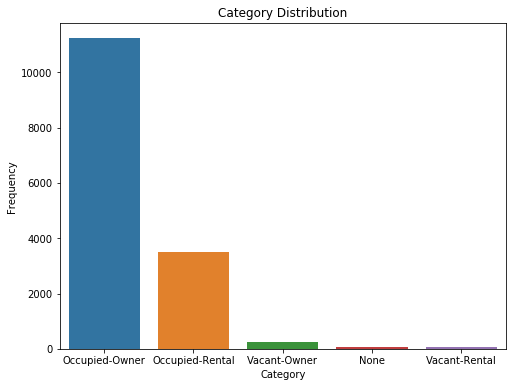

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=hd, x='housing_category')
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

In [27]:
# For county, run seperate and only once because None category data will be excluded

hd1 = hd[hd['housing_category'] != 'None']
category_counts = hd1.groupby(['county', 'year', 'housing_category']).size().unstack(fill_value=0)
category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0).reset_index()
category_proportions = category_proportions.round(2)
category_proportions = category_proportions.rename_axis(columns=None)

category_proportions

,county,year,Occupied-Owner,Occupied-Rental,Vacant-Owner,Vacant-Rental
0,Adair County,2020,0.61,0.39,0.0,0.00
1,Adair County,2021,0.65,0.35,0.0,0.00
2,Adair County,2022,0.70,0.26,0.0,0.04
3,Andrew County,2020,1.00,0.00,0.0,0.00
4,Andrew County,2021,1.00,0.00,0.0,0.00
...,...,...,...,...,...,...
340,Worth County,2021,1.00,0.00,0.0,0.00
341,Worth County,2022,1.00,0.00,0.0,0.00
342,Wright County,2020,0.89,0.11,0.0,0.00
343,Wright County,2021,0.89,0.11,0.0,0.00


In [28]:
numerical_cols = ['Occupied-Owner', 'Occupied-Rental', 'Vacant-Owner', 'Vacant-Rental']

scaler = MinMaxScaler()
category_proportions[numerical_cols] = (scaler.fit_transform(category_proportions[numerical_cols])).round(2)
print(category_proportions)

            county  year  Occupied-Owner  Occupied-Rental  Vacant-Owner  \
0     Adair County  2020            0.34             0.70           0.0   
1     Adair County  2021            0.41             0.62           0.0   
2     Adair County  2022            0.49             0.46           0.0   
3    Andrew County  2020            1.00             0.00           0.0   
4    Andrew County  2021            1.00             0.00           0.0   
..             ...   ...             ...              ...           ...   
340   Worth County  2021            1.00             0.00           0.0   
341   Worth County  2022            1.00             0.00           0.0   
342  Wright County  2020            0.81             0.20           0.0   
343  Wright County  2021            0.81             0.20           0.0   
344  Wright County  2022            0.92             0.09           0.0   

     Vacant-Rental  
0             0.00  
1             0.00  
2             0.44  
3             0

In [29]:
housing_stats_data = hd.copy()

In [30]:
housing_stats_data.columns

Index(['geo_id', 'median_value', 'total_estimate', 'est_total_occupied',
       'est_total_vacant', 'est_total_owner_occupied', 'est_total_rental',
       'estimate_total_less_than_10000', 'estimate_total_10000_to_14999',
       'estimate_total_15000_to_19999', 'estimate_total_20000_to_24999',
       'estimate_total_25000_to_29999', 'estimate_total_30000_to_34999',
       'estimate_total_35000_to_39999', 'estimate_total_40000_to_49999',
       'estimate_total_50000_to_59999', 'estimate_total_60000_to_69999',
       'estimate_total_70000_to_79999', 'estimate_total_80000_to_89999',
       'estimate_total_90000_to_99999', 'estimate_total_100000_to_124999',
       'estimate_total_125000_to_149999', 'estimate_total_150000_to_174999',
       'estimate_total_175000_to_199999', 'estimate_total_200000_to_249999',
       'estimate_total_250000_to_299999', 'estimate_total_300000_to_399999',
       'estimate_total_400000_to_499999', 'estimate_total_500000_to_749999',
       'estimate_total_750000_

In [40]:
#loading it into db

In [ ]:
import psycopg2
from psycopg2 import sql
from psycopg2.extensions import adapt, register_adapter, AsIs
from sqlalchemy import create_engine,text
import getpass

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

#Create Table
mypasswd = getpass.getpass("Enter your database password: ")

# Database connection details
database = "f24t03"
user = "jsmm8"
password = mypasswd
host = "pgsql"

# Create a connection to the database using SQLAlchemy for easier inserts
engine = create_engine(f'postgresql+psycopg2://{user}:{password}@{host}/{database}')

# Connect and create/drop the table, then insert data in chunks
try:
    # Connect to the database
    conn = psycopg2.connect(database=database, user=user, host=host, password=password)
    cursor = conn.cursor()
    print("Connected to the database.")

    # Drop the ethnicity table if it exists
    cursor.execute("DROP TABLE IF EXISTS housing_stats_data;")
    print("Dropped the housing_stats_data table if it existed.")

    # Create the <Table Name> table
    create_table_query = """
        CREATE TABLE housing_stats_data (
    geo_id VARCHAR(255),
    median_value INT,
    total_estimate INT,
    est_total_occupied INT,
    est_total_vacant INT,
    est_total_owner_occupied INT,
    est_total_rental INT,
    estimate_total_less_than_10000 INT,
    estimate_total_10000_to_14999 INT,
    estimate_total_15000_to_19999 INT,
    estimate_total_20000_to_24999 INT,
    estimate_total_25000_to_29999 INT,
    estimate_total_30000_to_34999 INT,
    estimate_total_35000_to_39999 INT,
    estimate_total_40000_to_49999 INT,
    estimate_total_50000_to_59999 INT,
    estimate_total_60000_to_69999 INT,
    estimate_total_70000_to_79999 INT,
    estimate_total_80000_to_89999 INT,
    estimate_total_90000_to_99999 INT,
    estimate_total_100000_to_124999 INT,
    estimate_total_125000_to_149999 INT,
    estimate_total_150000_to_174999 INT,
    estimate_total_175000_to_199999 INT,
    estimate_total_200000_to_249999 INT,
    estimate_total_250000_to_299999 INT,
    estimate_total_300000_to_399999 INT,
    estimate_total_400000_to_499999 INT,
    estimate_total_500000_to_749999 INT,
    estimate_total_750000_to_999999 INT,
    estimate_total_1000000_to_1499999 INT,
    estimate_total_1500000_to_1999999 INT,
    estimate_total_2000000_or_more INT,
    block_group VARCHAR(255),
    census_tract VARCHAR(255),
    county VARCHAR(255),
    state VARCHAR(255),
    year INT,
    pct_occupied FLOAT,
    pct_vacant FLOAT,
    pct_owner_occupied FLOAT,
    pct_rental FLOAT,
    occ_per_1000 FLOAT,
    vac_per_1000 FLOAT,
    housing_category VARCHAR(255),
    PRIMARY KEY (geo_id, year)
    );
        """
    cursor.execute(create_table_query)
    conn.commit()
    print("Created the housing_stats_data table.")

    # Insert data from <dataframe> in chunks
    chunk_size = 500
    for start in range(0, len(housing_stats_data), chunk_size):
        chunk = housing_stats_data.iloc[start:start + chunk_size]
        chunk.to_sql('housing_stats_data', engine, if_exists='append', index=False)
        print(f"Uploaded a chunk of {len(chunk)} records to the housing_stats_data table.")

    print("Data uploaded successfully.")

    # Query the inserted data to confirm
    query = "SELECT * FROM housing_stats_data;"
    housing_stats_data = pd.read_sql(query, conn)
    print("Data extracted successfully! DataFrame shape:", housing_stats_data.shape)

except Exception as e:
    print("An error occurred:", e)

finally:
    # Ensure that the cursor and connection are closed
    if cursor:
        cursor.close()
    if conn:
        conn.close()

Enter your database password: ········
Connected to the database.
Dropped the housing_stats_data table if it existed.
Created the housing_stats_data table.
Uploaded a chunk of 500 records to the housing_stats_data table.
Uploaded a chunk of 500 records to the housing_stats_data table.
Uploaded a chunk of 500 records to the housing_stats_data table.
Uploaded a chunk of 500 records to the housing_stats_data table.
Uploaded a chunk of 500 records to the housing_stats_data table.
Uploaded a chunk of 500 records to the housing_stats_data table.
Uploaded a chunk of 500 records to the housing_stats_data table.
Uploaded a chunk of 500 records to the housing_stats_data table.
Uploaded a chunk of 500 records to the housing_stats_data table.
Uploaded a chunk of 500 records to the housing_stats_data table.
Uploaded a chunk of 500 records to the housing_stats_data table.
Uploaded a chunk of 500 records to the housing_stats_data table.
Uploaded a chunk of 500 records to the housing_stats_data table.

In [ ]:
# SQL query to grant privileges
grant_privileges_query = "GRANT ALL PRIVILEGES ON TABLE housing_stats_data TO ypd5yb, jsmm8, remcmf, jsmm8;"

with engine.connect() as connection:
        connection.execute(text(grant_privileges_query))
        print("Privileges granted successfully.")

Privileges granted successfully.
